In [61]:
plt.rcParams['figure.figsize'] = (8,5)


# **Retail Performance and Profit Optimization Analysis Using Global Superstore Dataset**


## Problem Definition

In the global retail industry, profitability is influenced by multiple operational
and strategic factors including product category performance, regional sales distribution,
discount strategies, and customer segmentation.

Retail businesses must continuously analyze transactional data to:
- Monitor overall sales performance
- Identify profit-driving and loss-making products
- Evaluate regional revenue contribution
- Assess the impact of discount strategies on profitability
- Improve operational efficiency

This project applies a data-driven approach to analyze global retail transactions
and generate actionable business insights for profit optimization.


## Executive Summary

This report presents a comprehensive analysis of global retail transaction data
to evaluate sales performance, profitability drivers, regional contribution,
and discount impact.

The analysis reveals category dominance, regional revenue distribution,
customer segment behavior, and operational efficiency indicators.

Strategic recommendations are provided to improve profit margins
and optimize business decision-making.


## Project Domain

This project falls under the domain of **Retail Analytics**.

Retail analytics focuses on analyzing transaction-level data to evaluate
sales performance, customer behavior, inventory movement, and profitability.

The Global Superstore dataset provides a structured view of retail operations
across different markets, regions, product categories, and customer segments,
making it suitable for comprehensive retail performance analysis.


## Dataset Overview

The dataset contains 45,609 transaction records and 24 attributes representing
global retail sales.

The dataset includes:

- **Order Information:** Order ID, Order Date, Ship Date, Ship Mode
- **Customer Information:** Customer ID, Customer Name, Segment
- **Location Details:** City, State, Country, Region, Market
- **Product Details:** Category, Sub-Category, Product Name
- **Financial Metrics:** Sales, Quantity, Discount, Profit
- **Operational Metrics:** Shipping Cost, Order Priority

The dataset enables time-series analysis, regional comparison,
profitability evaluation, and discount impact assessment.


## Dataset Quality Assessment

| Quality Aspect | Observation |
|----------------|-------------|
| Dataset Size | 45,609 rows, 24 columns |
| Data Variety | Mix of numerical and categorical variables |
| Financial Fields | Sales, Profit, Discount, Shipping Cost |
| Time Information | Order Date and Ship Date available |
| Business Scope | Multi-country, multi-region retail transactions |
| Data Readiness | Requires cleaning and formatting before analysis |


In [62]:
# Importing required libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting style for better visuals
sns.set(style="whitegrid")


In [63]:
# Loading the dataset

df = pd.read_csv("global_superstore_2016.csv", encoding="latin1")

# Display first 5 rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [64]:
# Checking number of rows and columns

df.shape


(51290, 24)

In [65]:
# Checking data types and non-null counts

df.info()

# Checking missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Postal Code,41296
City,0


In [66]:
# Statistical summary of numerical variables

df.describe()


,Row ID,Postal Code,Quantity,Discount,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,2.278766,0.212280,57.251373
min,1.00000,1040.000000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,14.000000,0.850000,933.570000


## Data Cleaning and Preprocessing

Before performing analysis, the dataset must be cleaned and transformed
to ensure accurate and meaningful results.

The following cleaning steps are performed:

1. Converting data types  
2. Handling missing values  
3. Removing unnecessary columns  
4. Feature engineering  


In [67]:
# Convert Order Date and Ship Date to datetime format

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df[['Order Date', 'Ship Date']].dtypes


,0
Order Date,datetime64[ns]
Ship Date,datetime64[ns]


In [68]:
# Remove currency symbols and commas from Sales and Profit, convert to float

df['Sales'] = df['Sales'].replace(r'[\$,]', '', regex=True).astype(float)
df['Profit'] = df['Profit'].replace(r'[\$,]', '', regex=True).astype(float)

df[['Sales', 'Profit']].dtypes


,0
Sales,float64
Profit,float64


In [69]:
# Drop Postal Code column due to excessive missing values

if 'Postal Code' in df.columns:
    df.drop(columns=['Postal Code'], inplace=True)

df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [70]:
# Remove duplicate rows if any

df.drop_duplicates(inplace=True)

df.shape


(51290, 23)

In [71]:
# Creating new analytical features

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Profit Margin'] = df['Profit'] / df['Sales']
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month,Profit Margin,Shipping Time
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,221.98,2,0.0,62.15,40.77,High,2014,11,0.279980,2
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,3709.40,9,0.1,-288.77,923.63,Critical,2014,2,-0.077848,2
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,5175.17,9,0.1,919.97,915.49,Medium,2014,10,0.177766,1
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,2892.51,5,0.1,-96.54,910.16,Medium,2014,1,-0.033376,2
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,2832.96,8,0.0,311.52,903.04,Critical,2014,11,0.109963,1


In [72]:
# Final check after cleaning

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Region          51290 non-null  object        
 12  Market          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


### Data Cleaning Conclusion

The dataset has been successfully cleaned and prepared for analysis.

- Converted date columns into proper datetime format.
- Cleaned financial columns by removing currency symbols and converting to float.
- Removed Postal Code column due to excessive missing values.
- Eliminated duplicate records.
- Created new analytical variables including Year, Month, Profit Margin, and Shipping Time.
- Verified that no missing values remain.

The dataset is now structured, consistent, and ready for detailed exploratory data analysis.


## Exploratory Data Analysis (EDA)

This section analyzes sales, profit distribution, regional performance,
category contribution, and discount impact to generate business insights.


In [73]:
# Summary statistics for key financial metrics

df[['Sales', 'Profit', 'Quantity', 'Discount', 'Shipping Cost']].describe()


,Sales,Profit,Quantity,Discount,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490685,28.610970,3.476545,0.142908,26.478567
std,487.565388,174.341066,2.278766,0.212280,57.251373
min,0.440000,-6599.980000,1.000000,0.000000,1.002000
25%,30.762500,0.000000,2.000000,0.000000,2.610000
50%,85.055000,9.240000,3.000000,0.000000,7.790000
75%,251.055000,36.810000,5.000000,0.200000,24.450000
max,22638.480000,8399.980000,14.000000,0.850000,933.570000


### Statistical Interpretation

- The average sales value indicates the typical transaction size.
- Profit variability suggests presence of both high-margin and loss-making transactions.
- Discount distribution shows that significant price reductions are applied in some cases.
- Shipping cost variability indicates operational cost differences across regions.


In [74]:
pivot_category = pd.pivot_table(
    df,
    values=['Sales', 'Profit'],
    index='Category',
    aggfunc=['sum', 'mean']
)

pivot_category


sum                   mean            
                    Profit       Sales     Profit       Sales
Category                                                     
Furniture        285082.62  4110453.03  28.913045  416.881646
Office Supplies  518594.84  3787495.46  16.574350  121.048786
Technology       663779.21  4744558.76  65.455005  467.859063

The pivot table shows total and average sales and profit per category,
allowing evaluation of both revenue dominance and profitability efficiency.


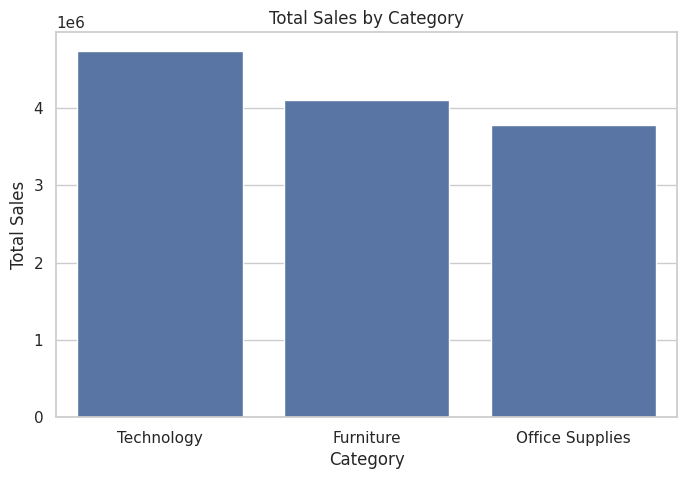

In [75]:
# Total Sales by Category

category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Category")
plt.ylabel("Total Sales")
plt.show()


### Insight:
The Technology category generates the highest total sales,
indicating strong demand and higher revenue contribution compared
to Furniture and Office Supplies.


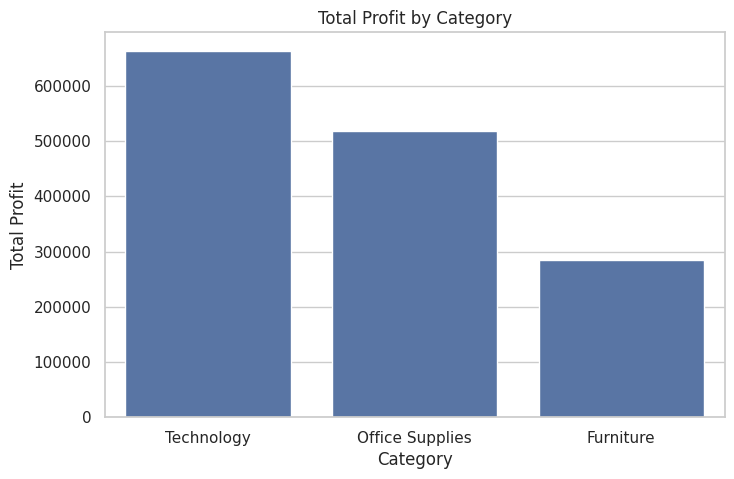

In [76]:
# Total Profit by Category

category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_profit.index, y=category_profit.values)
plt.title("Total Profit by Category")
plt.ylabel("Total Profit")
plt.show()


### Insight:
While Technology generates high sales, it also contributes significantly
to profit. Furniture may show high sales but lower profit margins,
indicating potential pricing or cost inefficiencies.


In [77]:
margin_by_category = df.groupby('Category')['Profit Margin'].mean().sort_values(ascending=False)

margin_by_category


,Profit Margin
Category,
Office Supplies,0.059005
Technology,0.049680
Furniture,0.008376


Average profit margin analysis highlights which categories generate
higher returns per unit of sales, offering guidance for pricing strategies.


In [78]:
top_sub = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(5)
bottom_sub = df.groupby('Sub-Category')['Profit'].sum().sort_values().head(5)

top_sub, bottom_sub


(Sub-Category
 Copiers       258567.63
 Phones        216717.44
 Bookcases     161924.37
 Appliances    141562.63
 Chairs        140396.24
 Name: Profit, dtype: float64,
 Sub-Category
 Tables      -64083.55
 Fasteners    13844.08
 Labels       14988.80
 Supplies     22559.04
 Envelopes    28849.26
 Name: Profit, dtype: float64)

Certain sub-categories consistently generate losses,
indicating the need for pricing or cost-structure review.


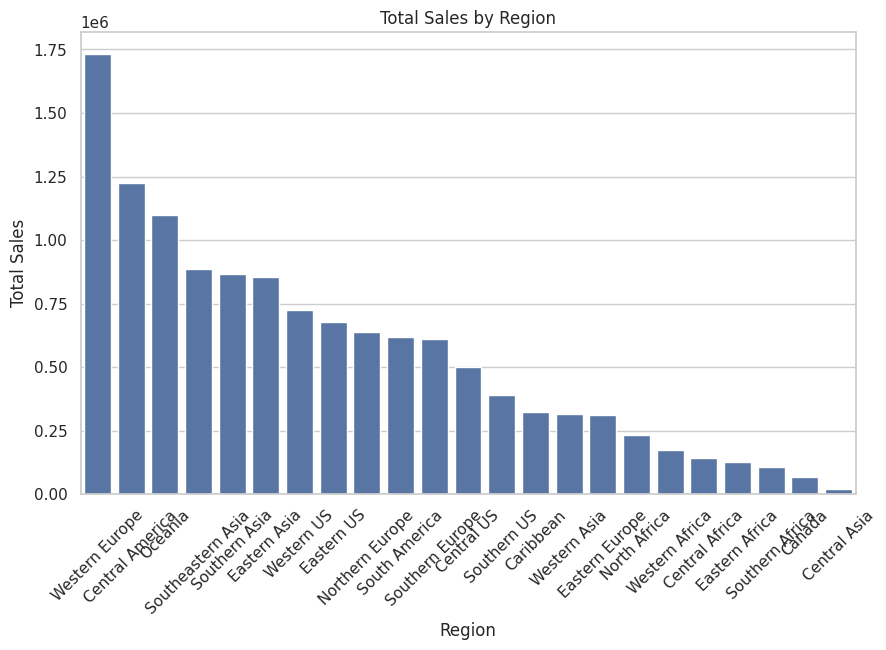

In [79]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.xticks(rotation=45)
plt.title("Total Sales by Region")
plt.ylabel("Total Sales")
plt.show()


### Insight:
Certain regions dominate global revenue generation.
This indicates strong market penetration and customer demand
in those geographic locations.


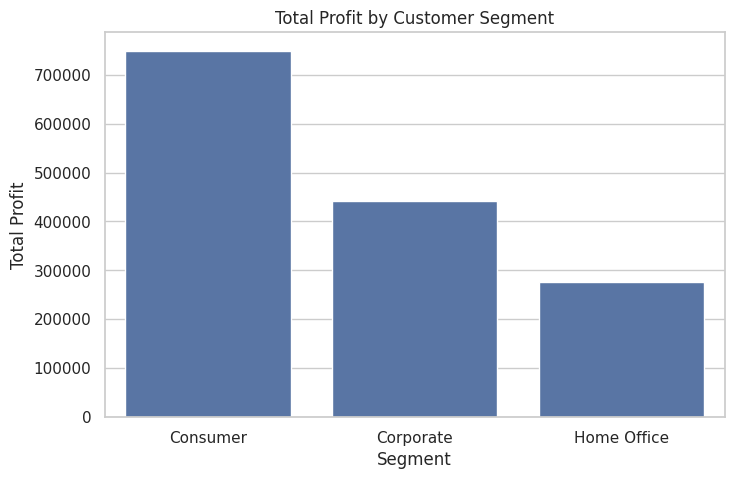

In [80]:
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=segment_profit.index, y=segment_profit.values)
plt.title("Total Profit by Customer Segment")
plt.ylabel("Total Profit")
plt.show()



### Insight:
The Consumer segment typically contributes the largest portion
of total profit, followed by Corporate and Home Office segments.
This suggests a stronger performance in individual retail customers.


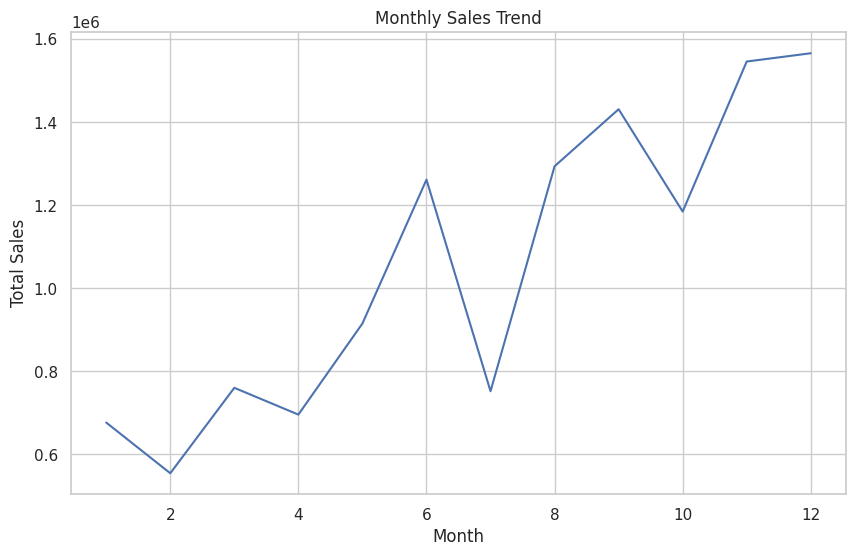

In [81]:
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.show()


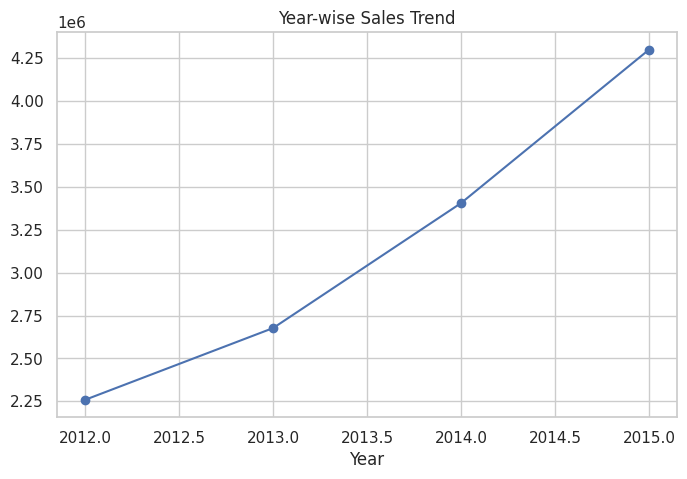

In [82]:
yearly_sales = df.groupby('Year')['Sales'].sum()

plt.figure(figsize=(8,5))
yearly_sales.plot(kind='line', marker='o')
plt.title("Year-wise Sales Trend")
plt.show()


Year-wise analysis shows overall revenue growth trend,
indicating business expansion over time.


### Insight:
Sales fluctuate throughout the year, indicating seasonal demand patterns.
Certain months consistently generate higher sales, reflecting
strong seasonal purchasing behavior.


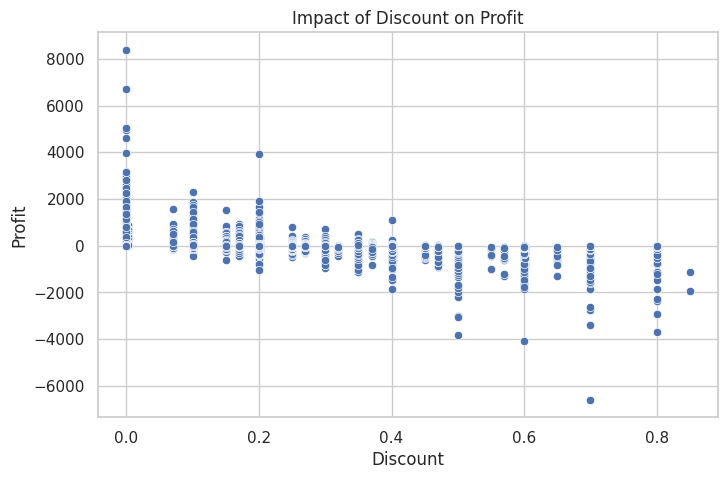

In [83]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Impact of Discount on Profit")
plt.show()


### Insight:
Higher discounts negatively impact profitability.
As discount percentage increases, profit margins tend to decline,
highlighting the need for optimized discount strategies.


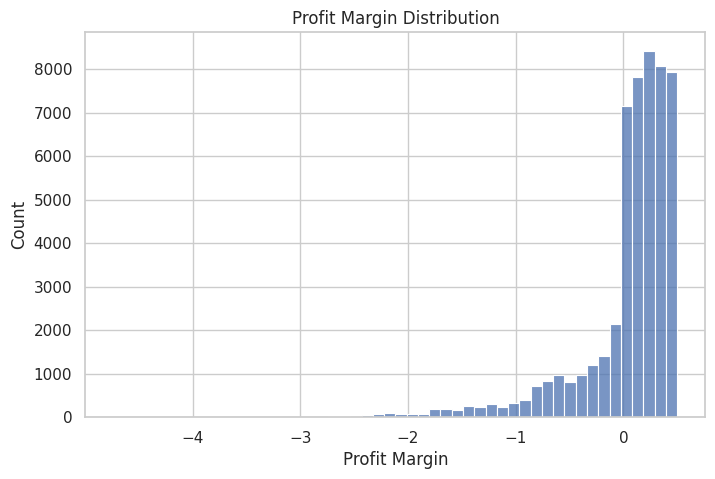

In [84]:
plt.figure(figsize=(8,5))
sns.histplot(df['Profit Margin'], bins=50)
plt.title("Profit Margin Distribution")
plt.show()


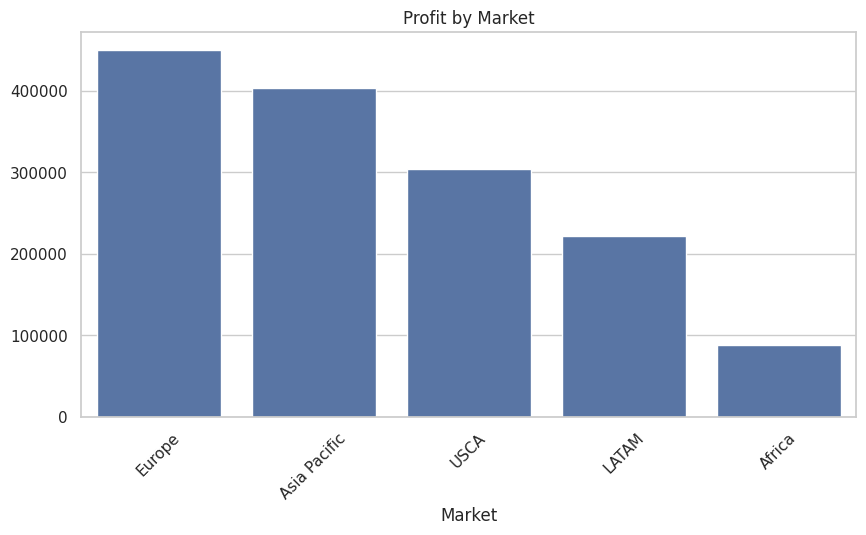

In [85]:
market_profit = df.groupby('Market')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=market_profit.index, y=market_profit.values)
plt.xticks(rotation=45)
plt.title("Profit by Market")
plt.show()


### Insight:
The distribution indicates both positive and negative margins.
Negative margins suggest loss-making transactions that require review.


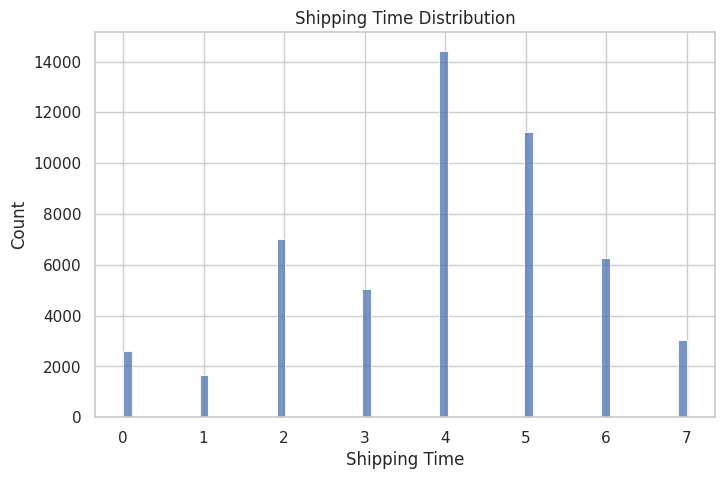

In [86]:
plt.figure(figsize=(8,5))
sns.histplot(df['Shipping Time'])
plt.title("Shipping Time Distribution")
plt.show()


### Insight:
Most deliveries occur within a standard time window.
Longer shipping durations may impact customer satisfaction and operational efficiency.


In [87]:
shipping_analysis = df.groupby('Ship Mode')['Shipping Time'].mean()

shipping_analysis


,Shipping Time
Ship Mode,
First Class,2.181746
Same Day,0.037394
Second Class,3.230187
Standard Class,4.998018


Average shipping time differs across shipping modes,
indicating efficiency variation in delivery strategies.


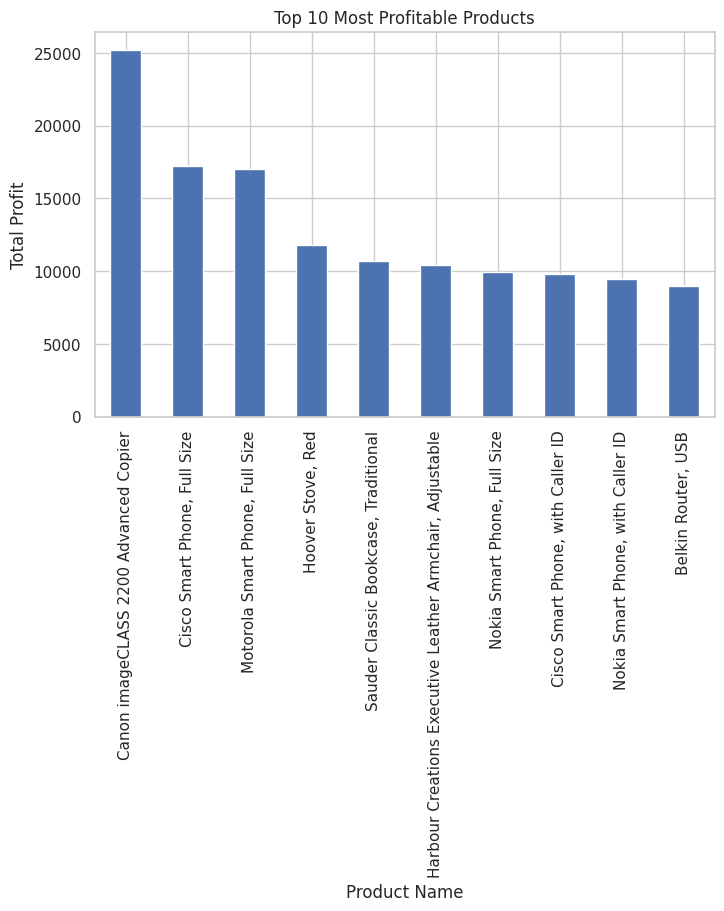

In [88]:
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
top_products.plot(kind='bar')
plt.title("Top 10 Most Profitable Products")
plt.ylabel("Total Profit")
plt.show()


### Insight:
A small number of products contribute significantly to overall profit.
These high-performing products should be prioritized in inventory management.


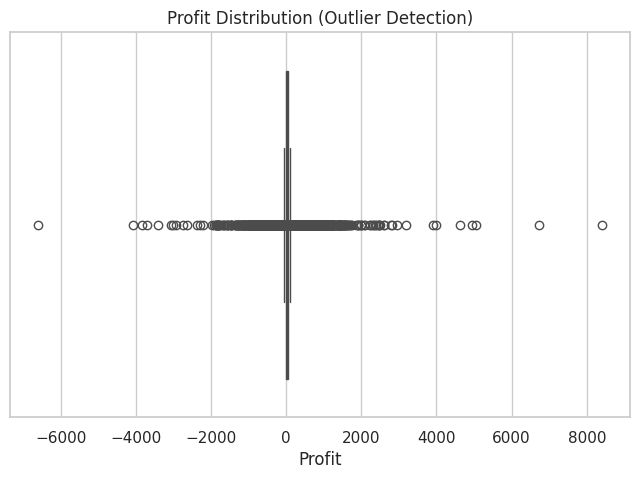

In [89]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Profit'])
plt.title("Profit Distribution (Outlier Detection)")
plt.show()


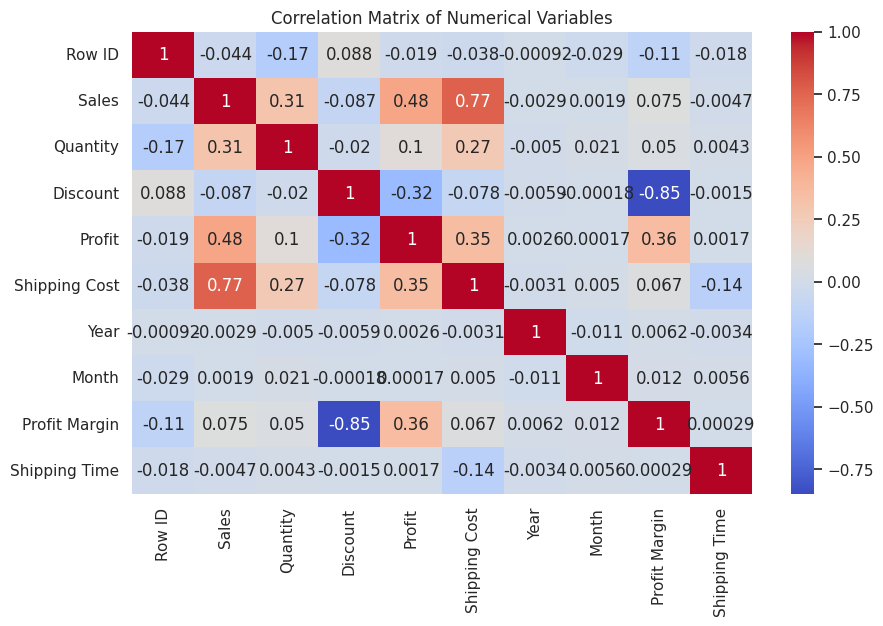

In [90]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


### Insight:
Discount shows a negative correlation with Profit and Profit Margin.
Sales shows a positive relationship with Quantity and Shipping Cost.
These correlations highlight key financial drivers in retail performance.


## Strategic Business Implications

Based on the analysis:

- Focus marketing efforts on high-margin categories.
- Reevaluate discount-heavy sub-categories.
- Optimize shipping strategies to reduce operational costs.
- Expand operations in top-performing regions.
- Minimize exposure to loss-generating products.


## Overall Findings

- Technology category dominates revenue and profit.
- Consumer segment generates the highest profit contribution.
- Certain regions outperform others in total sales.
- High discount rates reduce profitability significantly.
- A limited set of products contribute most of the profit.
- Shipping efficiency plays a role in operational performance.


## Future Recommendations

- Optimize discount strategies to prevent profit erosion.
- Focus marketing on high-performing regions and categories.
- Improve inventory planning for top profitable products.
- Reduce loss-making transactions by revising pricing strategies.
- Implement predictive analytics for demand forecasting.
